In [1]:
# Loading modules
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import pathlib
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [12]:
# Path Verification
data_dir = pathlib.Path('dataset')
print(data_dir)
print(os.path.abspath(data_dir))

dataset
C:\Users\STAEL TADONTSA\Desktop\DL\dataset


In [13]:
# Data quantity verification
image_count = len(list(data_dir.glob('*/*')))
print(image_count)

286


In [17]:
# Define image dimensions and batch size
img_height, img_width = 180, 180
batch_size = 32

# Load the training dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.3,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    label_mode='binary'  
)

# Load the validation dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.3,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    label_mode='binary' 
)

Found 286 files belonging to 2 classes.
Using 201 files for training.
Found 286 files belonging to 2 classes.
Using 85 files for validation.


In [18]:
# Use ResNet50 as base model
base_model = tf.keras.applications.ResNet50(
    include_top=False,
    weights='imagenet',
    input_shape=(img_height, img_width, 3)
)

In [19]:
# Freeze the layers of the base model
base_model.trainable = False

In [23]:
# Create a new model
model = Sequential([
    base_model,
    Flatten(),
    Dense(16, activation='relu'),
    Dense(2, activation='softmax')  
])

In [24]:
# Compile the model
model.compile(
    optimizer=Adam(),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [25]:
# Train the model
history = model.fit(train_ds, validation_data=val_ds, epochs=4)

Epoch 1/4
7/7 [==============================] - 14s 2s/step - loss: 1.8928 - accuracy: 0.5522 - val_loss: 0.4712 - val_accuracy: 0.8471
Epoch 2/4
7/7 [==============================] - 12s 2s/step - loss: 0.5208 - accuracy: 0.7612 - val_loss: 0.5367 - val_accuracy: 0.6118
Epoch 3/4
7/7 [==============================] - 13s 2s/step - loss: 0.4186 - accuracy: 0.8060 - val_loss: 0.3616 - val_accuracy: 0.8000
Epoch 4/4
7/7 [==============================] - 13s 2s/step - loss: 0.2919 - accuracy: 0.9104 - val_loss: 0.2544 - val_accuracy: 0.8706


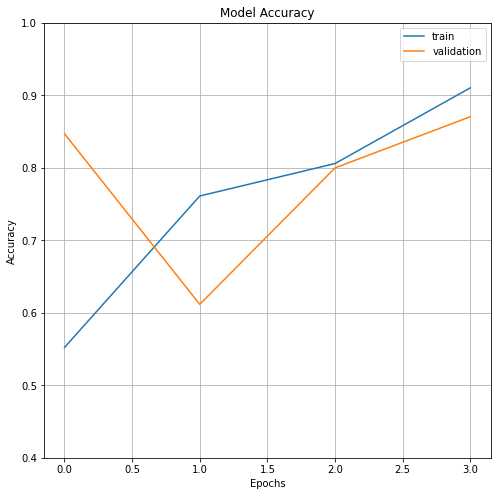

In [27]:
# Plot training history
plt.figure(figsize=(8, 8))
epochs_range = range(4)
plt.plot(epochs_range, history.history['accuracy'], label="Training Accuracy")
plt.plot(epochs_range, history.history['val_accuracy'], label="Validation Accuracy")
plt.axis(ymin=0.4, ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

In [28]:
# Save the model
model.save("model.keras")

In [29]:
# Make predictions on a sample image
image_path = "mv.jpg"
img = tf.keras.preprocessing.image.load_img(image_path, target_size=(img_height, img_width))
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Create a batch

In [30]:
predictions = model.predict(img_array)

1/1 [==============================] - 1s 669ms/step


In [31]:
# Interpret the predictions
class_names = ["Adulte", "Enfant"]
predicted_class_index = np.argmax(predictions)
predicted_class = class_names[predicted_class_index]
print("Predicted class:", predicted_class)

Predicted class: Adulte
